In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy.matrices import Matrix
from scipy import integrate

Para que el sistema sea estable en el punto $(q_*, p_*)$ debe cumplirse que $f(q_*, p_*) = g(q_*, p_*) = 0$ y además $f(q_* + \epsilon, p_* + \delta)$ y $g(q_* + \epsilon, p_* + \delta)$ deben decaer a 0, donde $\epsilon$ y $\delta$ son pequeños incrementos independientes.

Con esta idea, definimos las siguientes funciones para $p$ y $q$.

$$q(t) = q_* + \epsilon(t)$$
$$p(t) = p_* + \delta(t)$$

Derivando las expresiones obtenemos:

$$q'(t) = \epsilon'(t)$$
$$p'(t) = \delta'(t)$$

Luego concluímos que $f = \epsilon'$ y $g = \delta'$, por definición de f y g. Al expandir $f(q_*, p_*)$ en Taylor, obtenemos la siguiente expresión:

$$
\epsilon' = f(q_* + \epsilon, p_* + \delta) = f(q_*, p_*) + \epsilon\frac{\partial f}{\partial q} + \delta\frac{\partial f}{\partial p} + O(\epsilon^2,\delta^2) = \epsilon\frac{\partial f}{\partial q} + \delta\frac{\partial f}{\partial p} + O(\epsilon^2,\delta^2)
$$

Similarmente, expandiendo para $g(q_*, p_*)$, se obtiene lo siguiente:

$$
\delta' = g(q_* + \epsilon, p_* + \delta) = g(q_*, p_*) + \epsilon\frac{\partial g}{\partial q} + \delta\frac{\partial g}{\partial p} + O(\epsilon^2,\delta^2) = \epsilon\frac{\partial g}{\partial q} + \delta\frac{\partial g}{\partial p} + O(\epsilon^2,\delta^2)
$$

Escribiendo lo anterior en sistema matricial se obtiene:

$$
\frac{\partial}{\partial t}\begin{pmatrix} q \\ p \end{pmatrix} = 
\begin{align}\begin{pmatrix} \frac{\partial f}{\partial q} & \frac{\partial f}{\partial p} \\ \frac{\partial g}{\partial q} & \frac{\partial g}{\partial p} \end{pmatrix}
\begin{pmatrix} q \\ p \end{pmatrix}\end{align}
$$

Que es lo que queríamos.

In [2]:
#Resolvemos x' = 0 = 2x - y  ; y' = 0 = x + 2y (estos deberían ser los puntos fijos)

a = np.array([[2, -1], [1, 2]])
b = np.array([0, 0])
x = np.linalg.solve(a, b)
x

array([0., 0.])

In [3]:
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)

In [4]:
dxdt = 2*x - y
dydt = x + 2*y

m11 = sym.diff(dxdt, x)
m12 = sym.diff(dxdt, y)
m21 = sym.diff(dydt, x)
m22 = sym.diff(dydt, y)

M = np.matrix([[int(m11), int(m12)], [int(m21), int(m22)]])
M

matrix([[ 2, -1],
        [ 1,  2]])

In [5]:
eigen = np.linalg.eig(M)

In [6]:
values = eigen[0]
values

array([2.+1.j, 2.-1.j])

In [7]:
vectors = eigen[1]
vectors = vectors/np.linalg.norm(vectors)
vectors

matrix([[0.5+0.j , 0.5-0.j ],
        [0. -0.5j, 0. +0.5j]])

In [8]:
def System(r,t):
    
    x,y = r
    
    dxdt = 2*x-y
    dydt = x + 2*y
    
    return [dxdt,dydt]

In [9]:
def Integrator4(f,r0,t):
    
    h = t[1] - t[0]
    print(h)
    
    x = np.zeros_like(t)
    y = np.zeros_like(t)
    
    x[0] = r0[0]
    y[0] = r0[1]
    
    K1 = np.zeros(2)
    K2 = np.zeros(2)
    K3 = np.zeros(2)
    K4 = np.zeros(2)
    
    # Las pendientes instantaneas
    R = np.zeros(2)

    for i in range(1,len(t)):
        
        R = np.array([x[i-1],y[i-1]])
        
        K1 = f(R,t[i-1])
        
        R = np.array([x[i-1]+0.5*h*K1[0],y[i-1]+0.5*h*K1[1]])
        
        K2 = f(R,t[i-1] + 0.5*h)
        
        R = np.array([x[i-1]+0.5*h*K2[0],y[i-1]+0.5*h*K2[1]])
        
        K3 = f(R,t[i-1] + 0.5*h)
        
        R = np.array([x[i-1]+h*K1[0],y[i-1]+h*K1[1]])
        
        K4 = f(R,t[i-1] + h)
        
        x[i] = x[i-1] + (1/6)*h*(K1[0]+2*K2[0]+2*K3[0]+K4[0])
        y[i] = y[i-1] + (1/6)*h*(K1[1]+2*K2[1]+2*K3[1]+K4[1])
        
    return x,y

In [10]:
t = np.linspace(0.,1.,10000)
r0 = (-0.2, 0.)
r1 = (0.2, 0.)
r2 = (0., 0.2)
r3 = (0., -0.2)
r4 = (-0.2/np.sqrt(2), -0.2/np.sqrt(2))
r5 = (-0.2/np.sqrt(2), 0.2/np.sqrt(2))
r6 = (0.2/np.sqrt(2), -0.2/np.sqrt(2))
r7 = (0.2/np.sqrt(2), 0.2/np.sqrt(2))

x0, y0 = Integrator4(System, r0, t)
x1, y1 = Integrator4(System, r1, t)
x2, y2 = Integrator4(System, r2, t)
x3, y3 = Integrator4(System, r3, t)
x4, y4 = Integrator4(System, r4, t)
x5, y5 = Integrator4(System, r5, t)
x6, y6 = Integrator4(System, r6, t)
x7, y7 = Integrator4(System, r7, t)

0.00010001000100010001
0.00010001000100010001
0.00010001000100010001
0.00010001000100010001
0.00010001000100010001
0.00010001000100010001
0.00010001000100010001
0.00010001000100010001


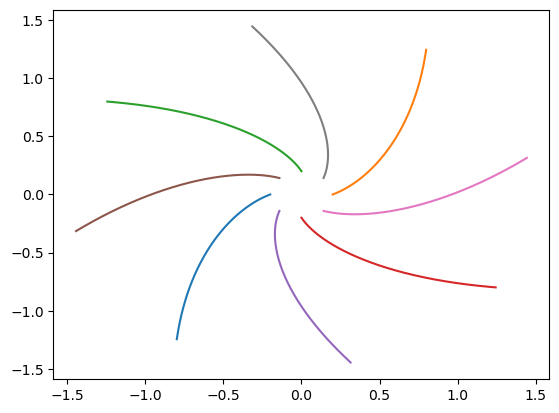

In [11]:
plt.plot(x0, y0)
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.plot(x4, y4)
plt.plot(x5, y5)
plt.plot(x6, y6)
plt.plot(x7, y7)

In [12]:
#A continuación graficamos el campo para este fluido

x = np.linspace(-3, 3, 13)
y = np.linspace(-3, 3, 13)

[X,Y] = np.meshgrid(x, y)

In [13]:
VX = 2*X - Y
VY = X + 2*Y

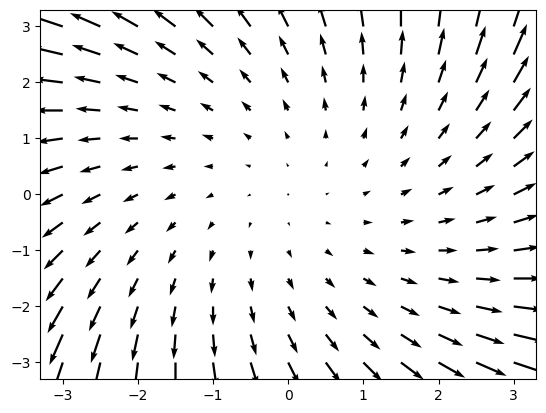

In [14]:
plt.quiver(X, Y, VX, VY)

El punto crítico se encuentra en el origen (0,0). No obstante, se puede ver que es un punto inestable, pues el fluido tiende a escapar con un mínimo movimiento fuera del orígen